# ADALINE

ADALINE neurons are very similar to a standard perceptron. The only difference is the addition of a linear activation function and a cost function.

In this section we will adapt the perceptron to include these new features and compare them to the perceptron.

Aside from the implementation of the adaline, most of this code is the same as before.

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
h = 0.025
colours = np.array(["r", "b", "g", "k", "c", "m"])
def plot_decision(ax, clf, X):
    cmap = ListedColormap(colours[:len(np.unique(y))])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.array([clf.predict(x) for x in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
def plot_points(ax, X, y):
    ax.plot
    ax.scatter(X[:, 0], X[:, 1], c=colours[y])

In [3]:
iris = datasets.load_iris()
X, y = (iris.data[:100, [0, 2]], iris.target[:100])  # For simplicity, pick only two features and only two classes
y[y == 0] = -1.0

Now let's implement the ADALINE algorithm.

To do this you will need to implement the following algorithm:

1. foreach iteration
    1. foreach instance
        1. Predict $\hat{y}$
        2. Calculate the error between $y$ and $\hat{y}$
        3. Create the weight update according to the ADALINE learning rule

With the following equations...

The net input:

$z=w_0 + w_1x_1+\dots+w_mx_m$

The weight update:

$ w_j = w_j + \Delta w_j$

Where $\Delta w_j$ is the ADALINE learning rule:

$w_j = w_j + \Delta w_j = w_j - \eta \sum(y - \phi(z))x_j$

Cost function (the error we want to monitor):

$J(\mathbf{w}) = \frac{1}{2} \sum_i (y - \phi(z))^2$

And the activation function:

$\phi(z) = w_0 + w_1x_1+\dots+w_mx_m = z$

---

Once this is done, you should be able to see a valid error chart. It should start high and end at zero.

In [4]:
class Perceptron():
    def __init__(self, itr=10, eta=0.01) -> None:
        self.n_iterations = itr
        self.eta = eta

    def fit(self, X, y) -> None:
        self.w_ = np.zeros(X.shape[1] + 1)              # Add one for bias input (threshold)
        self.errors_ = np.zeros(self.n_iterations)      # Array for holding errors

        for i in range(self.n_iterations):              # Foreach iteration
            for (x_i, y_i) in zip(X, y):                # Foreach training instance
                y_hat = self.predict(x_i)               # Predict output
                self.errors_[i] += np.abs(y_i - y_hat)  # Add error to the current error sum

                update = self.eta * (y_i - y_hat)       # Weights update equation
                self.w_[1:] += update * x_i             # Update the weights given input
                self.w_[0] += update                    # Update the bias weight

    def activation(self, z):
        if z >= 0:
            return 1
        else:
            return -1

    def net_input(self, X):
        return np.dot(self.w_[1:].T, X) + self.w_[0]    # Sum of weighted inputs

    def predict(self, X):
        return self.activation(self.net_input(X))       # Given X => net input => activate


class ADALINE:
    def __init__(self, itr=10, eta=0.01) -> None:
        self.n_iterations = itr
        self.eta = eta

    def fit(self, X, y) -> None:
        self.w_ = np.zeros(X.shape[1] + 1)              # Add one for bias input (threshold)
        self.errors_ = np.zeros(self.n_iterations)      # Array for holding errors

        for i in range(self.n_iterations):              # Foreach iteration
            for (x_i, y_i) in zip(X, y):                # Foreach training instance
                net_output = self.net_input(x_i)        # Output of net_input
                error = (y_i - net_output)
                self.errors_[i] += (error ** 2).sum() / 2.0  # Cost function

                # Update the weights. This is just linear gradient descent.
                self.w_[1:] += self.eta * x_i.T.dot(error)
                self.w_[0] += self.eta * error          # Update the bias weight
            self.errors_[i] /= len(y)                   # Average cost function

    def activation(self, X):                            # Activation is just linear
        return self.net_input(X)                        #  combination, same as net_input

    def net_input(self, X):
        return np.dot(self.w_[1:].T, X) + self.w_[0]    # Sum of weighted inputs

    def predict(self, X):
        if self.activation(X) >= 0:                     # Quantiser
            return 1.0
        else:
            return -1.0


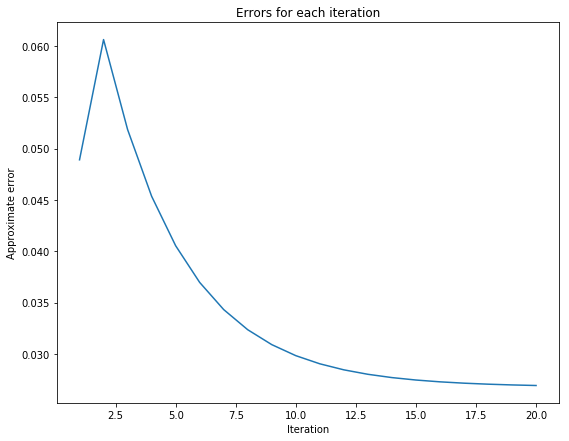

In [5]:
clf = ADALINE(eta=0.01, itr=20)
clf.fit(X, y)
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(range(1, len(clf.errors_) + 1), clf.errors_)
ax.set_title("Errors for each iteration")
ax.set_xlabel("Iteration")
ax.set_ylabel("Approximate error")
plt.show()

Now let's plot the decision boundary and the data.

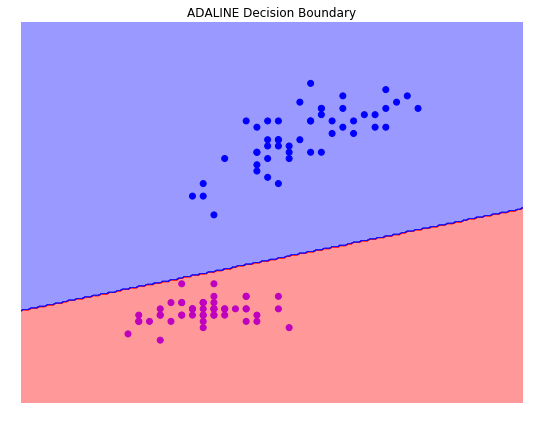

In [6]:
fig, ax = plt.subplots(figsize=(9, 7))
plot_decision(ax, clf, X)
plot_points(ax, X, y)
ax.set_axis_off()
ax.set_title("ADALINE Decision Boundary")
plt.show()

Notice how the decision boundary is being pulled a little low. This is because we haven't normalised the data. The decision bounardy will always tend towards zero.

In [7]:
X_std = np.copy(X)
X_std = StandardScaler().fit_transform(X_std)

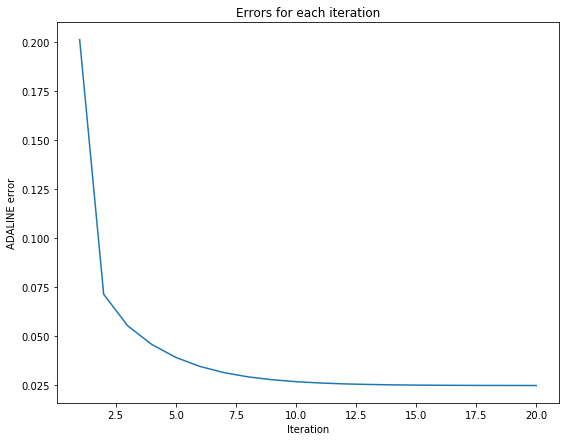

In [8]:
clf = ADALINE(eta=0.01, itr=20)
clf.fit(X_std, y)
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(range(1, len(clf.errors_) + 1), clf.errors_)
ax.set_title("Errors for each iteration")
ax.set_xlabel("Iteration")
ax.set_ylabel("ADALINE error")
plt.show()

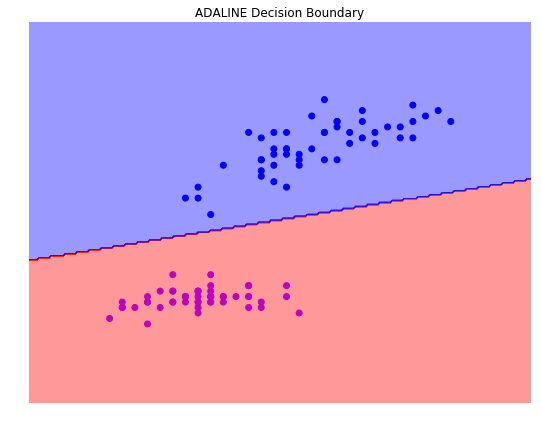

In [9]:
fig, ax = plt.subplots(figsize=(9, 7))
plot_decision(ax, clf, X_std)
plot_points(ax, X_std, y)
ax.set_axis_off()
ax.set_title("ADALINE Decision Boundary")
plt.show()

Note that it took about 10 iterations of the data to reach convergance. Now let's compare that to the perceptron.

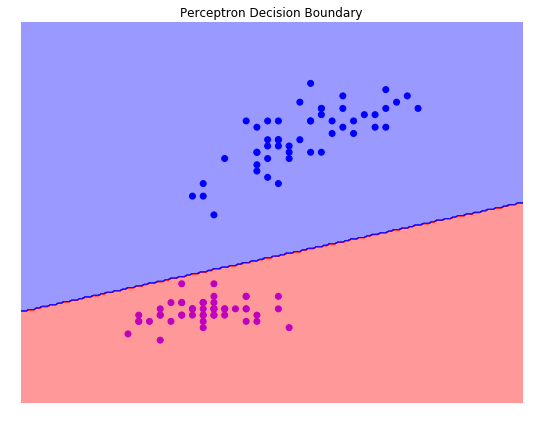

In [10]:
clf = Perceptron(eta=0.1, itr=20)
clf.fit(X, y)
fig, ax = plt.subplots(figsize=(9, 7))
plot_decision(ax, clf, X)
plot_points(ax, X, y)
ax.set_axis_off()
ax.set_title("Perceptron Decision Boundary")
plt.show()

## Bonus tasks

### Tasks:

- Instead of initialising the weights with zeros, intialise them randomly. What happens?
- Try with a different dataset
- Try with a non-separable dataset
- Try different ways of implementing the perceptron. Using matrix math maybe?